Classification - Census Income Prediction

Overview: The Census Income Classification assignment provides a dataset from the 1994 US Census database. The goal of this assignment is to apply a classification algorithm, in this case, decision trees using RandomForestClassifier, to predict whether certain attributes impact/predict whether an individual's annual income exceeds $50,000. My report provides the classification techniques applied to create and evaluate my model.

### Step 1: Load and explore the train dataset

In [15]:
import pandas as pd
import numpy as np

# Load training data and add columns to the data frame
columns = ["age", "workclass", "fnlwgt", "education","education-num",
           "marital-status", "occupation", "relationship", "race", "sex",
           "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

train_df = pd.read_csv("/Users/varshinipeddinti/Downloads/adult.data", header=None, names=columns, skipinitialspace=True, skiprows = 1)

# Explore the dataset
print(train_df.head(5))
train_df.shape
train_df.info()
print(train_df.isnull().sum())
train_df.describe()

   age         workclass  fnlwgt  education  education-num  \
0   50  Self-emp-not-inc   83311  Bachelors             13   
1   38           Private  215646    HS-grad              9   
2   53           Private  234721       11th              7   
3   28           Private  338409  Bachelors             13   
4   37           Private  284582    Masters             14   

       marital-status         occupation   relationship   race     sex  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              13  United-States  <=50K  
1             0             0             

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In this step, I loaded the adult.data file and converted it into a data frame using pandas. I also assigned appropriate column names and cleaned data by removing extra whitespace from categorical fields. I then learned/explored more about the dataset by checking its shape, data types, summary statistics, and the number of missing values. For example, there are 15 columns in the dataset, each column representing an attribute that we can measure to assess whether it affects the income of the individual. Also, it is important to note that some columns are numeric, like age, while other columns are categorical, such as working class.
This initial exploration helped me understand the structure of the data and identify issues such as missing entries and categorical features that require preprocessing before modeling.

#### Step 2: Preprocess the data:

### Load Test Data and Clean Dataset

In [16]:
test_df = pd.read_csv("/Users/varshinipeddinti/Downloads/adult.test", header=None, names=columns, skipinitialspace=True, skiprows = 1)

# Clean test labels to make data readable and accessable
test_df["income"] = test_df["income"].str.replace('.', '', regex=False)
print(train_df.head(5))
train_df.shape
train_df.info()
print(train_df.isnull().sum())
train_df.describe()

   age         workclass  fnlwgt  education  education-num  \
0   50  Self-emp-not-inc   83311  Bachelors             13   
1   38           Private  215646    HS-grad              9   
2   53           Private  234721       11th              7   
3   28           Private  338409  Bachelors             13   
4   37           Private  284582    Masters             14   

       marital-status         occupation   relationship   race     sex  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              13  United-States  <=50K  
1             0             0             

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Handle Missing Values in Test Dataset

In [17]:
# Fill missing values using median of each column for test data set
for col in numerical_cols:
    median_val = train_df[col].median()
    test_df[col] = test_df[col].fillna(median_val)
for col in categorical_cols:
    mode_val = test_df[col].mode()[0]
    test_df[col] = test_df[col].fillna(mode_val)

### Encode Categorical Features + Standardize Numerical Features

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separate target in binary form, which is income
y_train = train_df['income'].apply(lambda x: 1 if x == ">50K" else 0)
y_test = test_df['income'].apply(lambda x: 1 if x.strip('.') == ">50K" else 0)

# Drop target from features
X_train = train_df.drop('income', axis=1)
X_test = test_df.drop('income', axis=1)

# Identify column types for numeric and categorical
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Scale numeric features using StandardScalar from sklearn.preprocessing (z = (x - mean) / sd)
scaler = StandardScaler()
X_train_num = pd.DataFrame(scaler.fit_transform(X_train[numerical_cols]), columns=numerical_cols)
X_test_num = pd.DataFrame(scaler.transform(X_test[numerical_cols]), columns=numerical_cols)

# One-hot encode categorical features
# Combine train and test categorical columns
X_combined_cat = pd.concat([X_train[categorical_cols], X_test[categorical_cols]])
#One-hot encode the combined categorical data
X_combined_encoded = pd.get_dummies(X_combined_cat)

#Split the encoded data back into training and test sets
X_train_categorical = X_combined_encoded[:len(X_train)].reset_index(drop=True)
X_test_categorical = X_combined_encoded[len(X_train):].reset_index(drop=True)

#Final feature sets: combine numerical and encoded categorical features
X_train_final = pd.concat([X_train_num.reset_index(drop=True), X_train_categorical], axis=1)
X_test_final = pd.concat([X_test_num.reset_index(drop=True), X_test_categorical], axis=1)

For Step 2, I preprocessed the dataset by replacing all "?" entries with the median value of each column to fill the NA values. Since income is the target variable, I extracted this column from the dataset, and converted the values to binary, where an income >=50k is 1, and 0 when income <50k. From there, I identified which columns are numeric versus categorical, and standardized the numerical features using the scalar function in scikit-learn. 
One-hot encoding is an important technique for vectorizing categorical columns to ensure that they are measurable. Therefore, I one-hot encoded categorical features and then combined the numerical and encoded categorical features to create the final feature sets. 

### Step 3: Train a classification Model: Decision Trees

In [19]:
from sklearn.ensemble import RandomForestClassifier

decision_tree = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
decision_tree.fit(X_train_final, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

For Step 3, I trained a Decision Tree model using the RandomForestClassifier algorithm in scikit-learn. This classification model is trained to predict whether an individual's income exceeds $50,000 using preprocessed dataset. I chose Random Forest Classifier as it can handle both numerical and categorical features, where the number of trees was 100 (n_estimators=100). This trained model will later be used to make predictions and evaluate performance.

### Step 4: Tune hyperparameters to optimize performance

In [37]:
from sklearn.model_selection import GridSearchCV

# Set up a grid of values to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15]
}

# Use GridSearchCV to try all combinations
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_final, y_train)

# Print best combination
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# Use the best model found
decision_tree = grid_search.best_estimator_

Best parameters: {'max_depth': 15, 'n_estimators': 100}
Best CV score: 0.8612101885223821


In Step 4, I tuned hyperparameters for the Random Forest Classifier using GridSearch CV -- this method systematically searches through COMBINATIONS of hyperparameters to identify the best-performing model. I thought this method would be best as I get combinations of hyperparameters, rather than having to manually test different hyperparameters. Using this method, I tuned: n_estimators, which is the number of trees in the forest (tested values: 50, 100). I also tuned max_depth, which is the maximum depth of each tree (tested values: 10, 15).
How this process worked is GridSearchCV uses a 3-fold cross-validation and evaluated them based on accuracy, where the best CV score was an average accuracy of 86.12% at max_depth of 15, and n_estimators of 100. My output is the best combination and will be used in my final model. Step 4 is important to improving the model performance by preventing underfitting and overfitting by selecting optimal parameters. 

### Step 5: Predict income class for test dataset

In [21]:
y_prediction = decision_tree.predict(X_test_final)
y_prediction

array([0, 0, 0, ..., 1, 0, 1], shape=(16281,))

In Step 5, I applied the trained classification model to the preprocessed test dataset in order to predict whether each individual earns more than $50000. The predict() function is used to generate binary prediction (1 = >=50K, 0 = <50K) for each entry in the test set. These predicted labels will be used to compare to the true labels to evaluate model performance.

### Step 6: Evaluate your model using standard metrics

### Evaluation Metrics

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_prediction))
print("Test Precision:", precision_score(y_test, y_prediction))
print("Test Recall:", recall_score(y_test, y_prediction))
print("Test F1-score:", f1_score(y_test, y_prediction))
print("\nClassification Report:\n", classification_report(y_test, y_prediction))

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(decision_tree, X_train_final, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))

Test Accuracy: 0.8629076838032061
Test Precision: 0.7921795800144823
Test Recall: 0.5689027561102444
Test F1-score: 0.662227602905569

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     12435
           1       0.79      0.57      0.66      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.76      0.79     16281
weighted avg       0.86      0.86      0.85     16281
Cross-validation scores: [0.85657248 0.85703317 0.86194717 0.86455774 0.86286855]
Average CV Accuracy: 0.8605958230958229


### Confusion Matrix

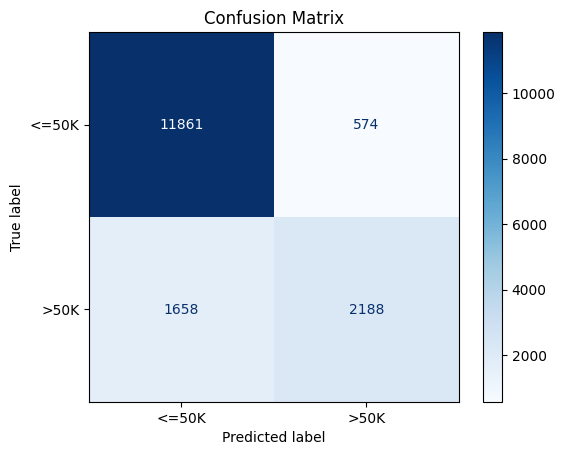

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_prediction)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["<=50K", ">50K"])
display.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

### ROC Curve

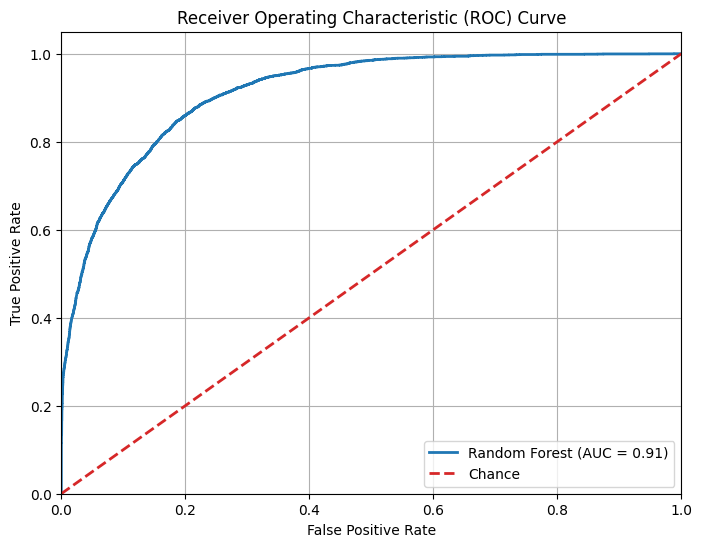

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve data
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, decision_tree.predict_proba(X_test_final)[:, 1])
auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='#1f77b4', lw=2, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='#d62728', lw=2, linestyle='--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

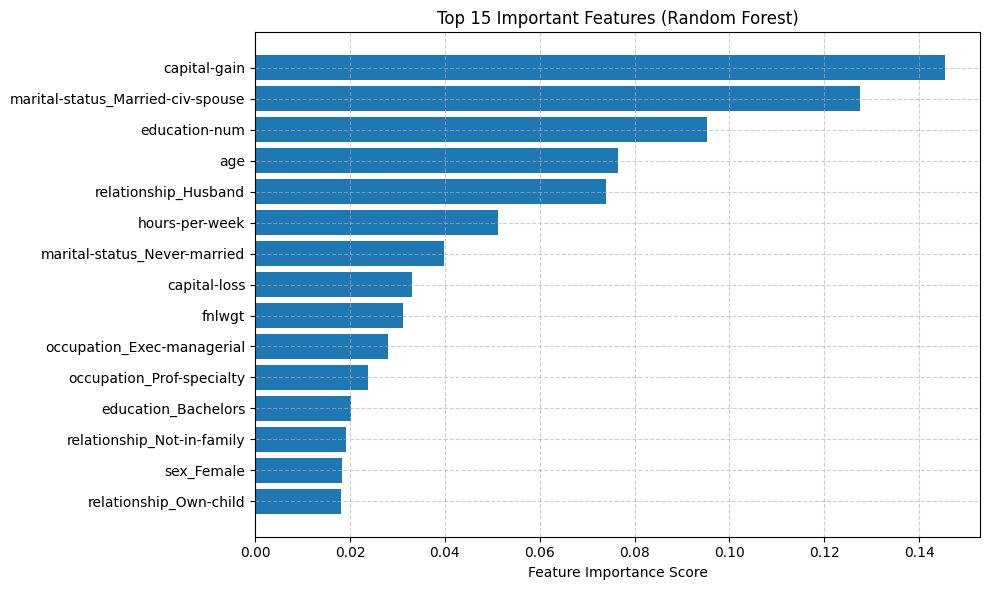

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances and names to create Plot Ranking
importances = decision_tree.feature_importances_
feature_names = X_train_final.columns

feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance to make Display easier to analyze
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'][::-1], feat_df['Importance'][::-1], color='#1f77b4')
plt.xlabel('Feature Importance Score')
plt.title('Top 15 Important Features (Random Forest)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In Step 6, I evaluated the model using various performance metrics. The classifier achieved an accuracy of 86.3% on the test set, indicating strong overall performance. The precision of 79.2% for the high-income class (> $50K) shows that most predicted high earners were truly high earners. However, the recall was 56.9%, meaning the model missed a significant portion of actual high-income individuals, and this suggests a conservative bias in predictions. The F1-score of 66.2% reflects a moderate balance between precision and recall.

Additionally, the model performed consistently across five folds in cross-validation, with an average accuracy of 86.1%, and this confirms its overall ability to generalize. While results are strong overall, future improvements could focus on increasing recall to ensure more high-income individuals are correctly identified, potentially by adjusting the classification threshold or rebalancing the training data.

### Step 7: Fairness and Bias Discussion

The goal of our project is to predict whether an individual's income exceeds $50,000 based on features such as age, education, occupation, race, and sex. While this is a valuable predictive task, applying machine learning (ML) to personal income data raises important ethical concerns, especially around fairness, bias, and social impact.

### Historical Bias
The dataset is sourced from 1994 US Census, and during this time, there was social and economic inequalities. As we learned in history, women were historically underpaid and underrepresented in high-paying roles. Additionally, certain races may have had fewer educational or job opportunities due to systemic discrimination.
Therefore, the datasets incorporates real-world biases, and the ML model that we trained may also reproduce and incorporate these inequalities.

### Label Bias
For our target variable, income, we are predicting an individual's potential to attain an income >50K or <=50K. However, this may not fully reflect the individual's potential, and this number might not best represent different types of populations and communities within society.

### Analyzing Model Behavior
From our model, the recall for the >50K was around 57%, which means that the model is missing many actual high-income individuals. However, the model did receive high recall (around 95%) for the <=50K class, which suggests that there is bias towards predicting low-income outcomes. 
Therefore, we have to be aware that if the model is applied to real-world, we may incorrectly classify individuals and put them in a disadvantage due to their label.

### Fairness Assessment
If race or sex is correlated with income, this model may discriminate even though those columns aren't directly used within the algorithm.
It would be unfair if the model is biased because if it is used in real-world application, this may continue to reinforce existing inequalities over time.

### Strategies For Improvement: What strategies could be used to mitigate fairness or bias issues?
Remove Sensitive Features: Dropping features like race or sex can reduce both direct and indirect bias in the model.
Reweigh or Resample Training Data: Balancing the dataset by reweighting or resampling improves fairness during training and helps the model generalize better across groups.
Threshold Tuning: Adjusting classification thresholds can help reduce false negatives for underrepresented or disadvantaged groups.
Group-Specific Models: Training separate models for different subgroups can help capture unique patterns within each group and reduce systemic bias.